# Импорт библиотек

In [26]:
import pandas as pd                                     # для работы с таблицами (как Excel в коде)
import numpy as np                                      # для математических операций
import matplotlib.pyplot as plt                         # для графиков
import seaborn as sns                                   # для красивых графиков
from sklearn.model_selection import train_test_split    # для разделения данных
from sklearn.preprocessing import StandardScaler        # для нормализации данных
from sklearn.linear_model import LinearRegression       # простая модель
from sklearn.ensemble import GradientBoostingRegressor  # сложная модель
from sklearn.metrics import mean_squared_error, mean_absolute_error  # для оценки качества

# Загрузка данных

In [53]:
train_csv = pd.read_csv('../data/train.csv')
test_csv = pd.read_csv('../data/test.csv')

# Первичный анализ данных

In [54]:
print("\nИнформация о данных:")
print(train_csv.info())

print("\nОсновные статистики:")
print(train_csv.describe())


Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360336 entries, 0 to 360335
Data columns (total 17 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   id                          360336 non-null  int64  
 1   store_sales(in millions)    360336 non-null  float64
 2   unit_sales(in millions)     360336 non-null  float64
 3   total_children              360336 non-null  float64
 4   num_children_at_home        360336 non-null  float64
 5   avg_cars_at home(approx).1  360336 non-null  float64
 6   gross_weight                360336 non-null  float64
 7   recyclable_package          360336 non-null  float64
 8   low_fat                     360336 non-null  float64
 9   units_per_case              360336 non-null  float64
 10  store_sqft                  360336 non-null  float64
 11  coffee_bar                  360336 non-null  float64
 12  video_store                 360336 non-null  float

# Разделение на признаки и целевую переменную

In [57]:
# Разделяем на признаки (X) и целевую переменную (y)
# Признаки - это то, на основе чего мы предсказываем
# Целевая переменная - то, что мы предсказываем (стоимость)

x = train_csv.drop("cost", axis=1)          # все колонки КРОМЕ cost
y = train_csv["cost"]                             # только колонка cost

# Проверка пропущенных значений

In [58]:
print("\nПропущенные значения")
print(x.isnull().sum())                           # посчитает пропуски в каждой колонке


Пропущенные значения
id                            0
store_sales(in millions)      0
unit_sales(in millions)       0
total_children                0
num_children_at_home          0
avg_cars_at home(approx).1    0
gross_weight                  0
recyclable_package            0
low_fat                       0
units_per_case                0
store_sqft                    0
coffee_bar                    0
video_store                   0
salad_bar                     0
prepared_food                 0
florist                       0
dtype: int64


# Визуализация распределения целевой переменной

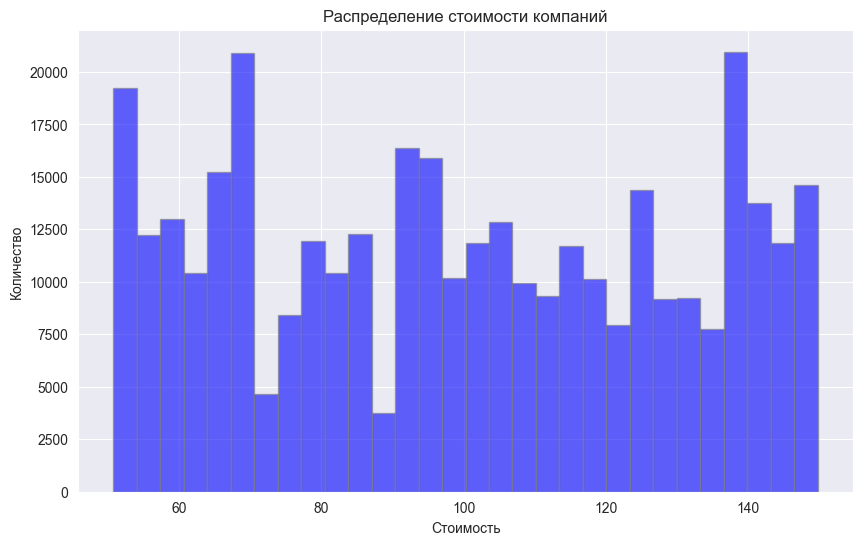

In [60]:
# 1. Смотрим на распределение стоимости
plt.figure(figsize=(10, 6))
plt.hist(y, bins=30, alpha=0.6, color="blue", edgecolor="gray", linewidth=1)
plt.title("Распределение стоимости компаний")
plt.xlabel("Стоимость")
plt.ylabel("Количество")
plt.show()

# Анализ корреляций

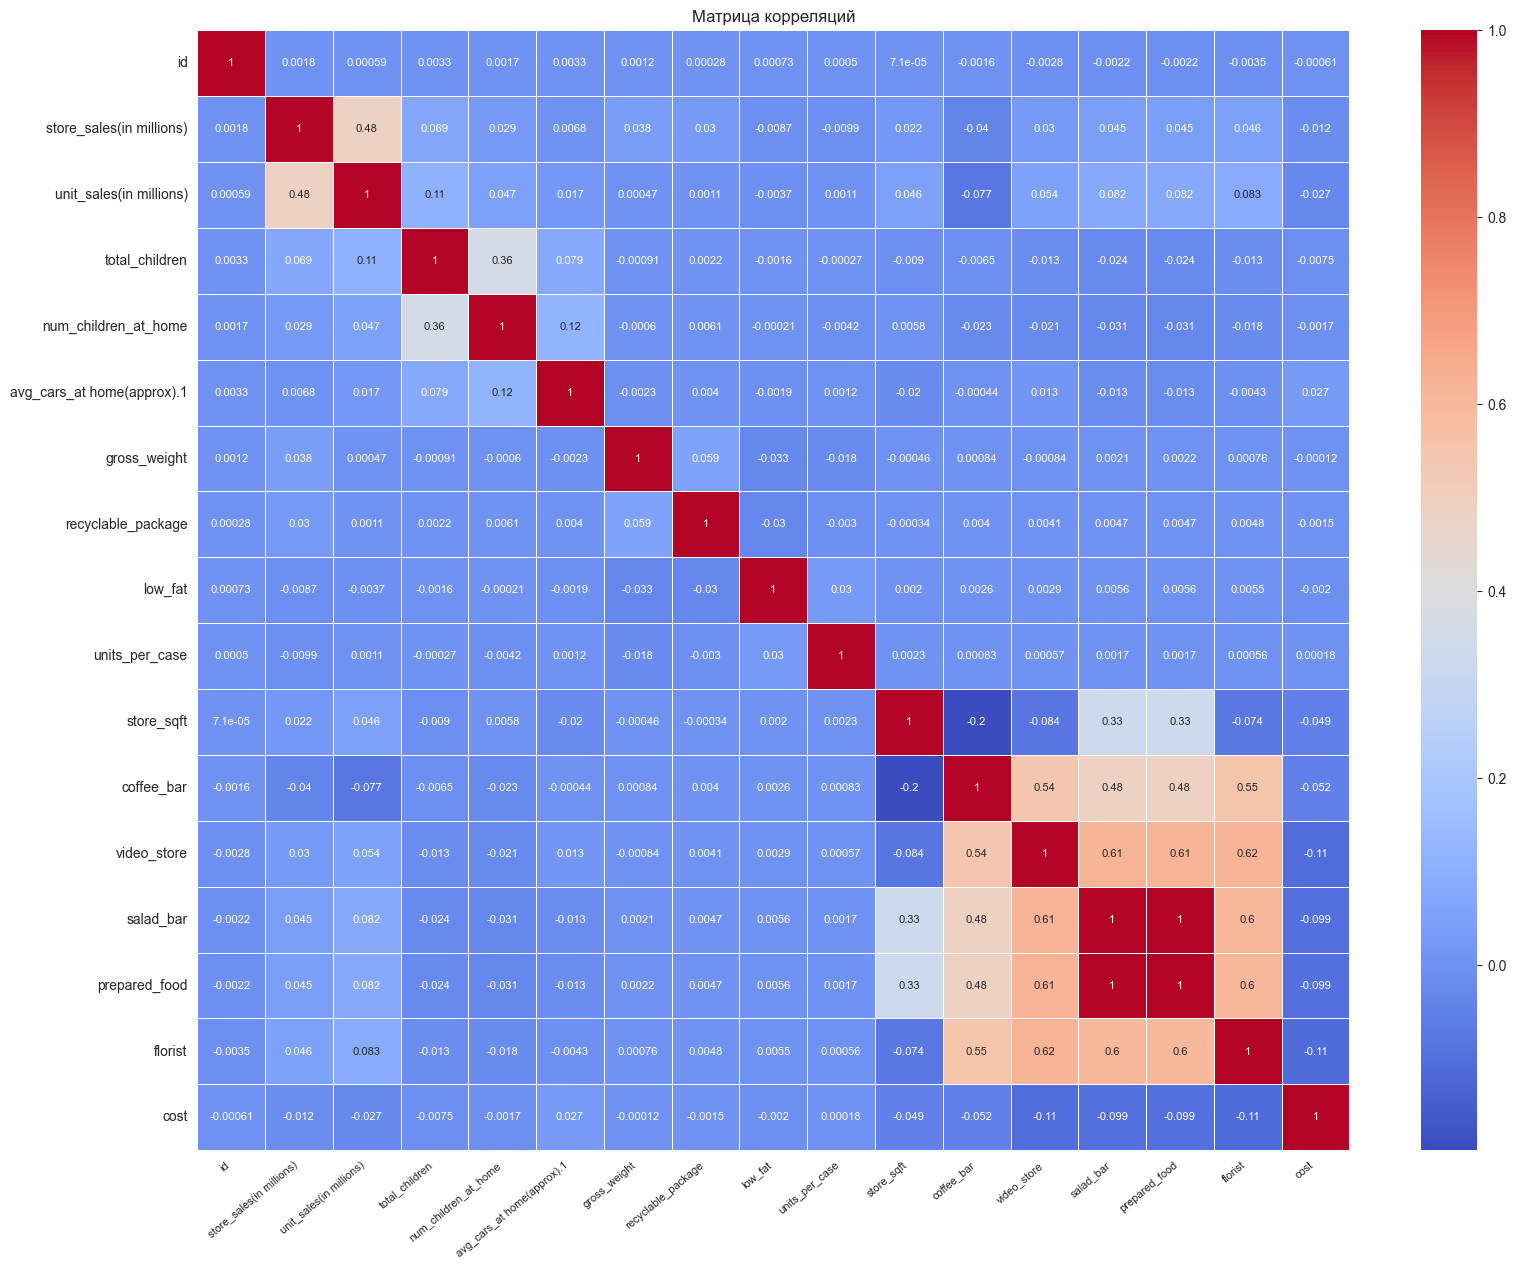

In [61]:
# 2. Смотрим корреляции (взаимосвязи между переменными)
plt.figure(figsize=(18, 14))
correlation_matrix = train_csv.corr()               # считаем корреляции
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5, linecolor="white", annot_kws={"size": 8})
plt.title("Матрица корреляций")
plt.subplots_adjust(left=0.15, right=0.95, bottom=0.15, top=0.95)
plt.xticks(rotation=40, ha='right', fontsize=8)
plt.show()

# Отбор значимых признаков

In [62]:
# 3. Смотрим на самые важные признаки для стоимости
correlation_with_cost = correlation_matrix["cost"].sort_values(ascending=False)
print("\nКорреляция признаков со стоимостью:")
print(correlation_with_cost)


Корреляция признаков со стоимостью:
cost                          1.000000
avg_cars_at home(approx).1    0.027098
units_per_case                0.000180
gross_weight                 -0.000116
id                           -0.000611
recyclable_package           -0.001455
num_children_at_home         -0.001727
low_fat                      -0.001975
total_children               -0.007482
store_sales(in millions)     -0.012387
unit_sales(in millions)      -0.026509
store_sqft                   -0.049201
coffee_bar                   -0.052086
salad_bar                    -0.098810
prepared_food                -0.098843
video_store                  -0.106786
florist                      -0.110414
Name: cost, dtype: float64
